In [2]:
# import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [3]:
# load the dataset.
df=pd.read_csv("globalterrorism.csv",encoding='ISO-8859-1',dtype='unicode')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.97E+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.97E+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.97001E+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.97001E+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.97001E+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# number of rows and columns in the datatset.
df.shape

(181691, 135)

In [7]:
# names of all the columns.
for n in df.columns:
    print(n)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [8]:
# datatypes of all the columns.
df.dtypes

eventid       object
iyear         object
imonth        object
iday          object
approxdate    object
               ...  
INT_LOG       object
INT_IDEO      object
INT_MISC      object
INT_ANY       object
related       object
Length: 135, dtype: object

In [9]:
# general inforamtion about the columns.
df.describe()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,181691,181691,181691,181691,9239,181691,2220,181691,181691,181691,...,28289,115500,76933,43516,181691,181691,181691,181691,181691,25038
unique,576,47,13,32,2244,2,1859,205,205,12,...,15429,83988,62263,36090,26,3,3,3,3,14306
top,2.01407E+11,2014,5,15,"September 18-24, 2016",0,08-04-1998,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,-9,-9,0,-9,"201612010023, 201612010024, 201612010025, 2016..."
freq,1726,16903,16875,6500,101,173452,18,24636,24636,50474,...,1607,205,134,139,78002,92527,92659,160467,83830,80


# Data Cleaning

In [10]:
# extract only required columns from the original dataset.
df=df[['iyear','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','gname','nkill']]
df.head()

,iyear,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,gname,nkill
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,NaN
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN


In [11]:
# name of all the columns.
for n in df.columns:
    print(n)

iyear
country_txt
region_txt
city
attacktype1_txt
targtype1_txt
gname
nkill


In [12]:
# change the name of the columns.
df.rename(columns = {'iyear':'year', 'country_txt':'country','region_txt':'region','attacktype1_txt':'attacktype','targtype1_txt':'target','gname':'organization','nkill':'killed'}, inplace = True)

In [13]:
# head of the dataset.
df.head()

,year,country,region,city,attacktype,target,organization,killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,NaN
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN


In [14]:
# sum of all null values in the columns.
df.isnull().sum()

year                0
country             0
region              0
city              434
attacktype          0
target              0
organization        0
killed          10313
dtype: int64

In [15]:
# drop all rows which have null values.
df = df.dropna()

In [16]:
# head of the dataset.
df.head()

,year,country,region,city,attacktype,target,organization,killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1
5,1970,United States,North America,Cairo,Armed Assault,Police,Black Nationalists,0
6,1970,Uruguay,South America,Montevideo,Assassination,Police,Tupamaros (Uruguay),0


In [17]:
# sum of all null values in the columns.
df.isnull().sum()

year            0
country         0
region          0
city            0
attacktype      0
target          0
organization    0
killed          0
dtype: int64

In [18]:
# datatype of all the columns.
df.dtypes

year            object
country         object
region          object
city            object
attacktype      object
target          object
organization    object
killed          object
dtype: object

In [90]:
# sort the dataset in descending order of the killed column.
df.sort_values(by=['killed'],ascending=False).head(7)

,year,country,region,city,attacktype,target,organization,killed
133518,2014,Iraq,Middle East & North Africa,Tikrit,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1570
73127,2001,United States,North America,New York City,Hijacking,Private Citizens & Property,Al-Qaida,1383
55934,1994,Rwanda,Sub-Saharan Africa,Gikoro,Armed Assault,Private Citizens & Property,Hutu extremists,1180
136283,2014,Iraq,Middle East & North Africa,Sinjar,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),953
133225,2014,Iraq,Middle East & North Africa,Badush,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670
179671,2017,Somalia,Sub-Saharan Africa,Mogadishu,Bombing/Explosion,Business,Al-Shabaab,588
76347,2004,Nepal,South Asia,Dhading district,Armed Assault,Government (General),Communist Party of Nepal- Maoist (CPN-M),518


In [20]:
# drop row number 73126.
df=df.drop([73126])

In [91]:
# sort the dataset in descending order of the killed column.
df.sort_values(by=['killed'],ascending=False).head(7)

,year,country,region,city,attacktype,target,organization,killed
133518,2014,Iraq,Middle East & North Africa,Tikrit,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1570
73127,2001,United States,North America,New York City,Hijacking,Private Citizens & Property,Al-Qaida,1383
55934,1994,Rwanda,Sub-Saharan Africa,Gikoro,Armed Assault,Private Citizens & Property,Hutu extremists,1180
136283,2014,Iraq,Middle East & North Africa,Sinjar,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),953
133225,2014,Iraq,Middle East & North Africa,Badush,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670
179671,2017,Somalia,Sub-Saharan Africa,Mogadishu,Bombing/Explosion,Business,Al-Shabaab,588
76347,2004,Nepal,South Asia,Dhading district,Armed Assault,Government (General),Communist Party of Nepal- Maoist (CPN-M),518


In [22]:
# change datatype of killed column from float to int.
df=df.astype({'killed':'int'})

In [23]:
# datatypes of all the columns.
df.dtypes

year            object
country         object
region          object
city            object
attacktype      object
target          object
organization    object
killed           int32
dtype: object

In [24]:
# head of the dataset.
df.head()

,year,country,region,city,attacktype,target,organization,killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1
5,1970,United States,North America,Cairo,Armed Assault,Police,Black Nationalists,0
6,1970,Uruguay,South America,Montevideo,Assassination,Police,Tupamaros (Uruguay),0


In [25]:
# number of rows and columns in the dataset.
df.shape

(170943, 8)

In [26]:
# basic information about the dataset.
df.describe()

,killed
count,170943.000000
mean,2.397928
std,11.066324
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,1570.000000


# Exploratory Data Analysis

# Number of Terrorist Activities Each Year

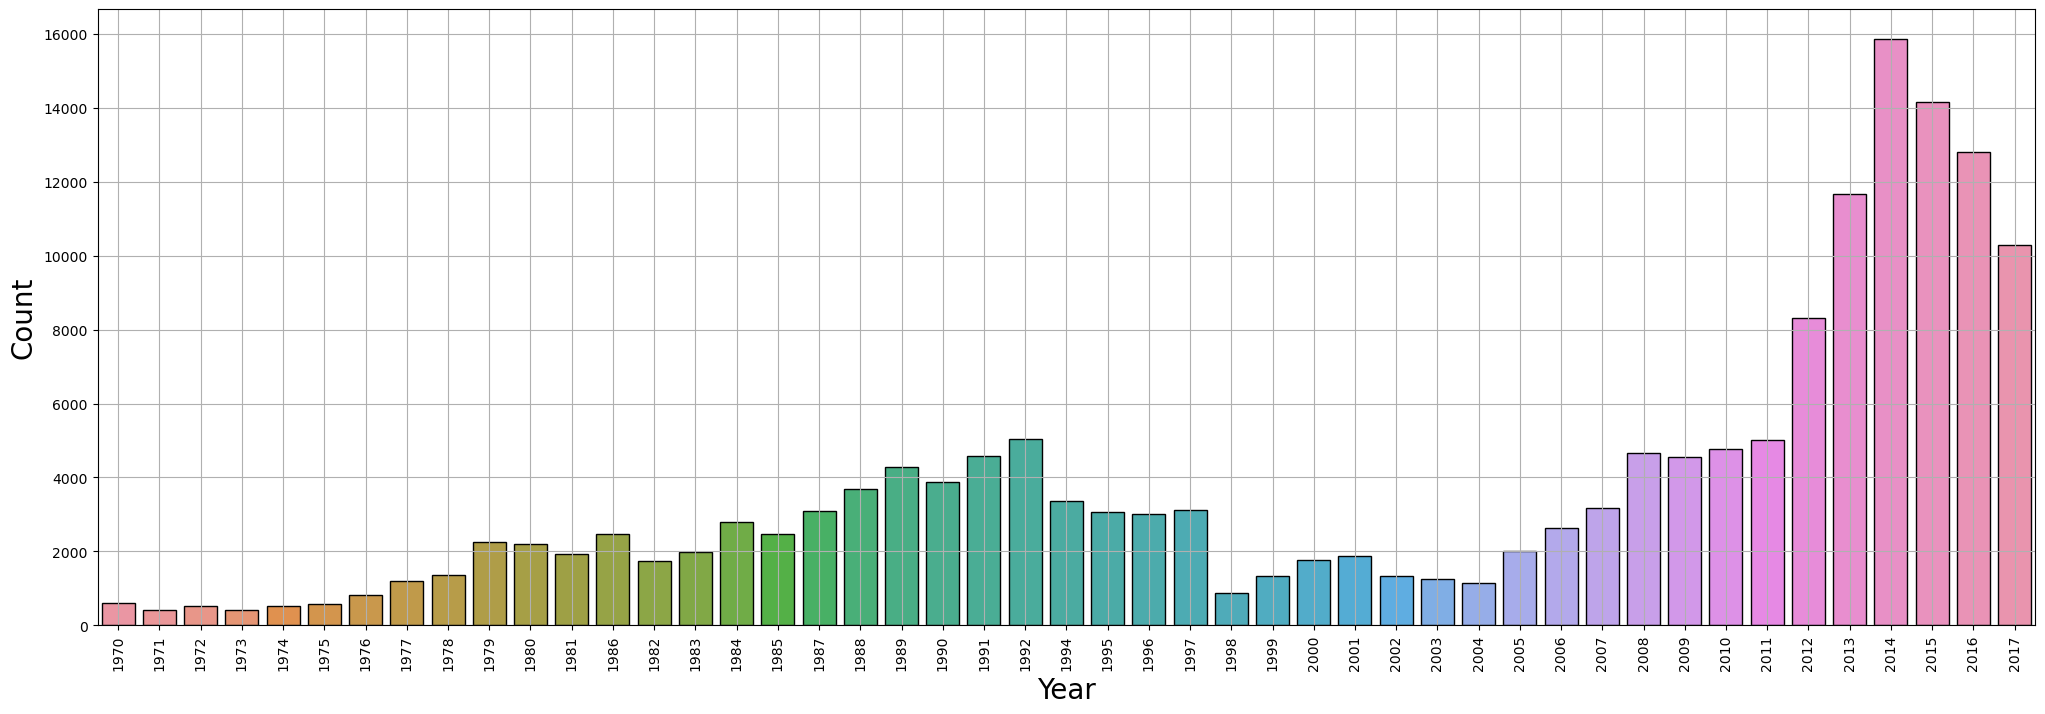

In [27]:
# year wise terrorist attack.
plt.subplots(figsize=(25,8))
sns.countplot(x='year', data=df,ec='black')
plt.xticks(rotation=90)
plt.xlabel("Year",fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.show()

# Terrorist Activities by Region in each Year

In [28]:
# extract year column of the dataset.
df.year

0         1970
1         1970
2         1970
5         1970
6         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: year, Length: 170943, dtype: object

In [29]:
# extract region column of the datatset.
df.region

0         Central America & Caribbean
1                       North America
2                      Southeast Asia
5                       North America
6                       South America
                     ...             
181686             Sub-Saharan Africa
181687     Middle East & North Africa
181688                 Southeast Asia
181689                     South Asia
181690                 Southeast Asia
Name: region, Length: 170943, dtype: object

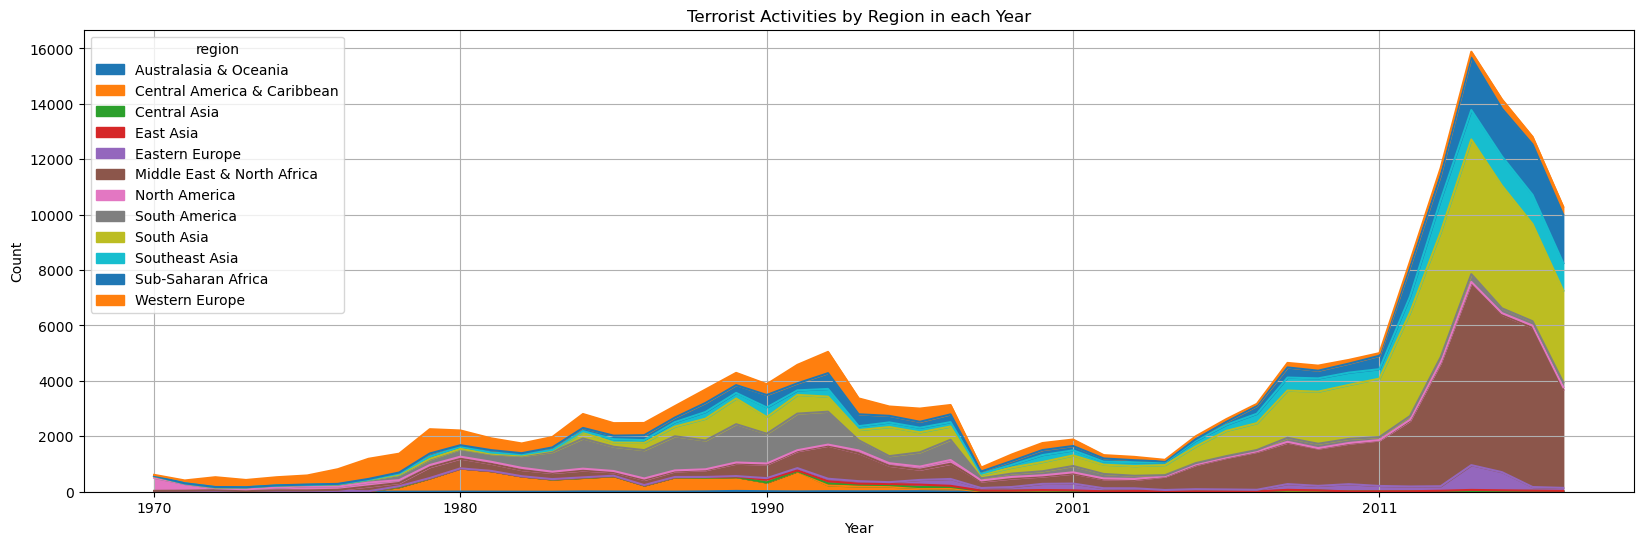

In [30]:
# region wise and year wise terrorist attcks visualization.
pd.crosstab(df.year,df.region).plot(kind='area',figsize=(20,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Terrorist Activities by Region in each Year')
plt.grid(True)
plt.show()

In [31]:
# create a dataset r_type.
r_type=df.region.value_counts().to_frame().reset_index()
r_type

,index,region
0,Middle East & North Africa,48171
1,South Asia,43887
2,South America,17306
3,Sub-Saharan Africa,15937
4,Western Europe,15727
5,Southeast Asia,11961
6,Central America & Caribbean,8022
7,Eastern Europe,4973
8,North America,3362
9,East Asia,763


In [32]:
# create a dataset r_type.
r_type=df.region.value_counts().to_frame().reset_index()
r_type

,index,region
0,Middle East & North Africa,48171
1,South Asia,43887
2,South America,17306
3,Sub-Saharan Africa,15937
4,Western Europe,15727
5,Southeast Asia,11961
6,Central America & Caribbean,8022
7,Eastern Europe,4973
8,North America,3362
9,East Asia,763


In [33]:
# change the name of the columns of the d_type dataset.
r_type.columns=['region_name','count']

In [34]:
# dataset r_type.
r_type

,region_name,count
0,Middle East & North Africa,48171
1,South Asia,43887
2,South America,17306
3,Sub-Saharan Africa,15937
4,Western Europe,15727
5,Southeast Asia,11961
6,Central America & Caribbean,8022
7,Eastern Europe,4973
8,North America,3362
9,East Asia,763


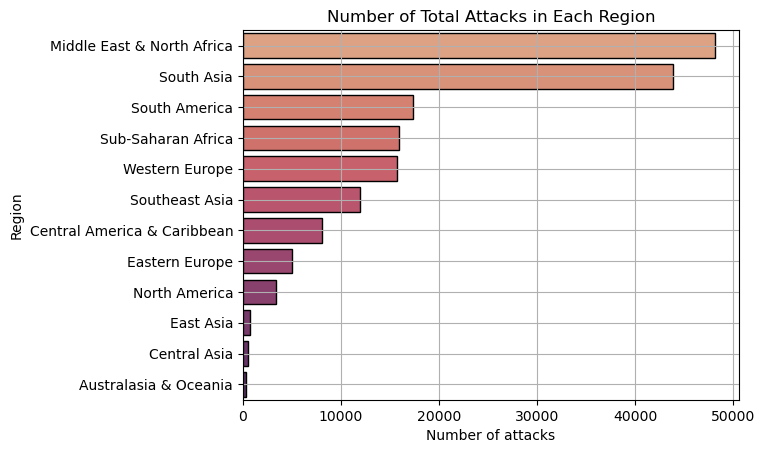

In [35]:
# total number of terrorist attacks in various regions of the world.
sns.barplot(y='region_name',x='count',data=r_type,orient='h',palette='flare',ec='black')
plt.grid(True)
plt.title("Number of Total Attacks in Each Region")
plt.ylabel('Region')
plt.xlabel('Number of attacks')
plt.show()

# Total number of attacks of each country

In [36]:
# create a datset top_1o_country.
top_10_country=df.country.value_counts()[:10].to_frame().reset_index()
top_10_country

,index,country
0,Iraq,23895
1,Pakistan,14108
2,Afghanistan,12223
3,India,11740
4,Colombia,7848
5,Philippines,6694
6,Peru,5457
7,United Kingdom,5065
8,Turkey,4160
9,El Salvador,3939


In [37]:
# change the name of the column of the dataset.
top_10_country.columns=['country_name','count']

In [38]:
# dataset top_10_country.
top_10_country

,country_name,count
0,Iraq,23895
1,Pakistan,14108
2,Afghanistan,12223
3,India,11740
4,Colombia,7848
5,Philippines,6694
6,Peru,5457
7,United Kingdom,5065
8,Turkey,4160
9,El Salvador,3939


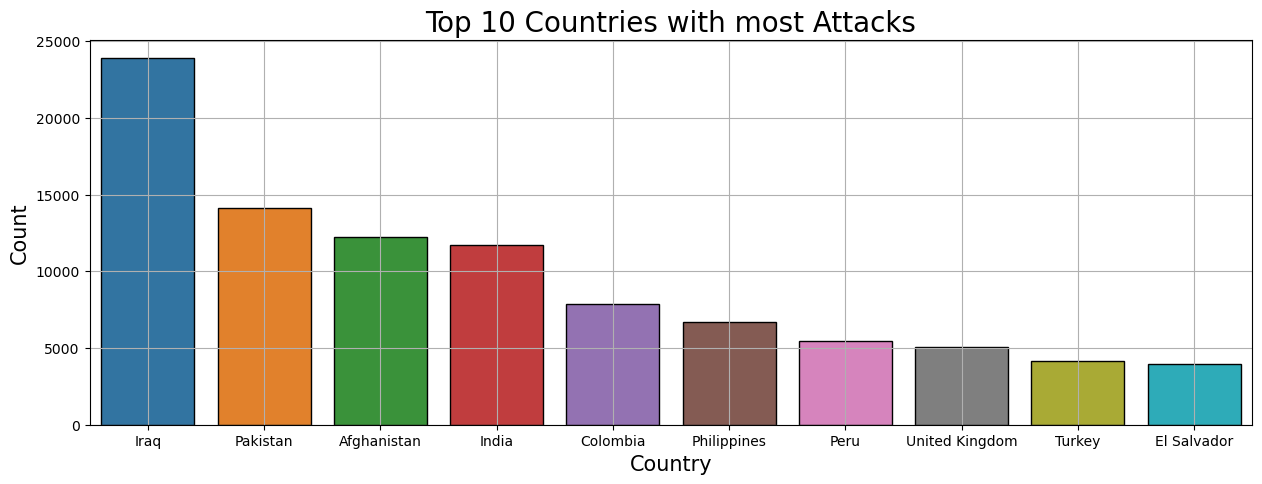

In [39]:
# bar-plot for top 10 countries which are most affected by terrorism.
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_country,x='country_name',y='count',ec='black',lw=1)
plt.grid(True)
plt.title('Top 10 Countries with most Attacks',fontsize=20)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

# Targer Method by Terrorists

In [40]:
# create a dataframe t_type.
t_type=df.attacktype.value_counts()[0:10].to_frame().reset_index()
t_type

,index,attacktype
0,Bombing/Explosion,84199
1,Armed Assault,40129
2,Assassination,19206
3,Facility/Infrastructure Attack,9774
4,Hostage Taking (Kidnapping),8585
5,Unknown,6549
6,Unarmed Assault,998
7,Hostage Taking (Barricade Incident),898
8,Hijacking,605


In [41]:
# change the column name of the t_type dataset.
t_type.columns=['target_type','count']

In [42]:
# datatset t_type.
t_type

,target_type,count
0,Bombing/Explosion,84199
1,Armed Assault,40129
2,Assassination,19206
3,Facility/Infrastructure Attack,9774
4,Hostage Taking (Kidnapping),8585
5,Unknown,6549
6,Unarmed Assault,998
7,Hostage Taking (Barricade Incident),898
8,Hijacking,605


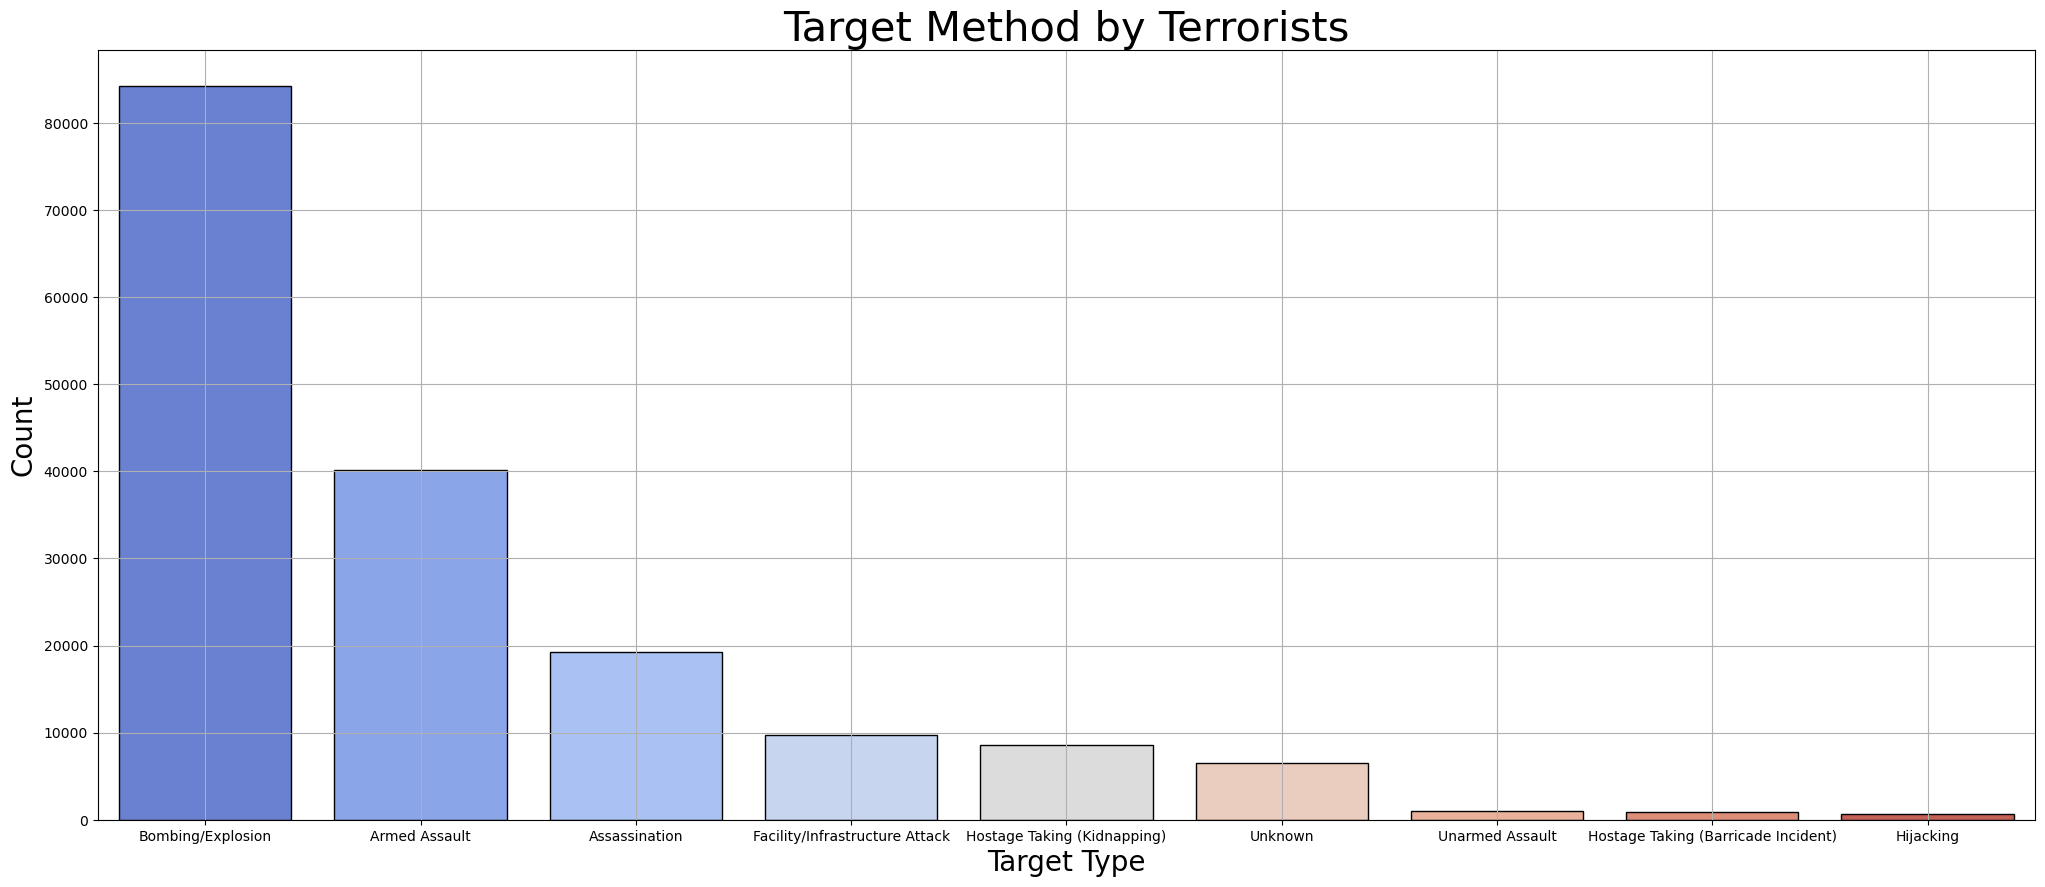

In [47]:
# bar-plot to show which method is most used by terrorist to attack.
plt.figure(figsize=(25,10))
sns.barplot(x='target_type',y='count',data=t_type,palette="coolwarm",ec='black')
plt.xlabel('Target Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Target Method by Terrorists",fontsize=30)
plt.grid(True)

# most Active terrorist Group in the world.

In [49]:
# create a dataset g_type.
g_type = df.organization.value_counts()[:5].to_frame().reset_index()
g_type

,index,organization
0,Unknown,79199
1,Taliban,7125
2,Islamic State of Iraq and the Levant (ISIL),5066
3,Shining Path (SL),4078
4,New People's Army (NPA),2693


In [50]:
# change the name of the column of the g_type dataset.
g_type.columns=['organization_name','count']

In [52]:
# dataset g_type.
g_type

,organization_name,count
0,Unknown,79199
1,Taliban,7125
2,Islamic State of Iraq and the Levant (ISIL),5066
3,Shining Path (SL),4078
4,New People's Army (NPA),2693


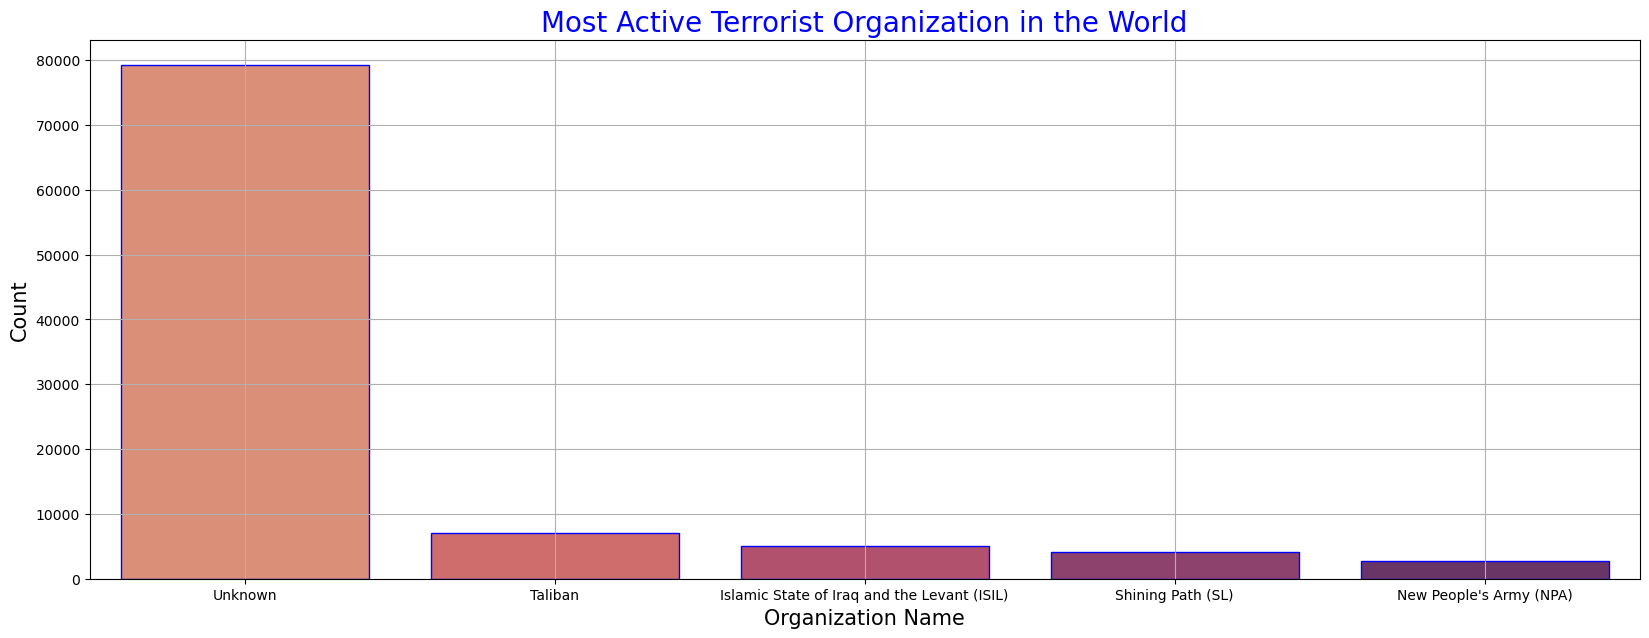

In [57]:
# bar-plot for the most active terrorist organization in the world.
plt.figure(figsize=(20,7))
sns.barplot(x='organization_name',y='count',data=g_type,ec='b',palette='flare')
plt.title('Most Active Terrorist Organization in the World',fontsize=20,c='b')
plt.xlabel('Organization Name',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.grid(True)

# Number of Total casualitiies in Each Country

In [58]:
# create a dataset top10_c.
top10_c=df.groupby('country').killed.sum().to_frame().reset_index().sort_values('killed',ascending=False)[0:10]
top10_c

,country,killed
81,Iraq,78567
0,Afghanistan,39137
131,Pakistan,23811
127,Nigeria,22682
77,India,19341
164,Sri Lanka,15530
172,Syria,15205
33,Colombia,14698
136,Peru,12771
50,El Salvador,12053


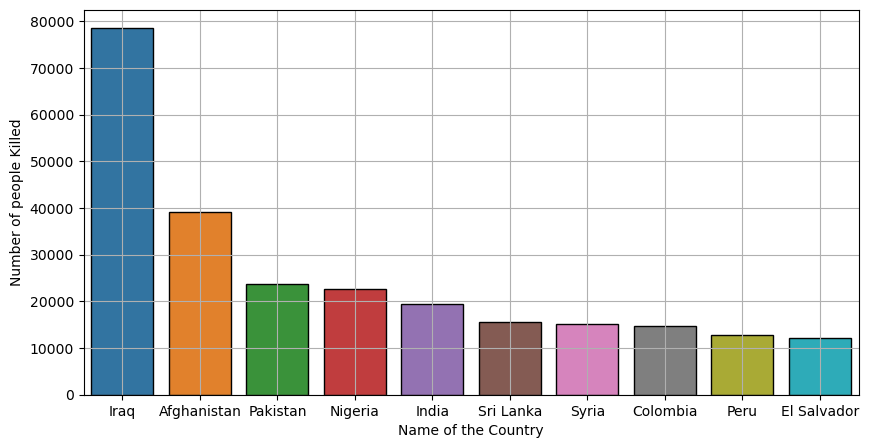

In [59]:
# bar-plot for top 10 countries where most number of people killed from the terrorism.
plt.figure(figsize=(10,5))
sns.barplot(y='killed',x='country',data=top10_c,ec='black')
plt.xlabel('Name of the Country')
plt.ylabel('Number of people Killed')
plt.grid(True)
plt.show(True)

# City where terrorist killed most number of people in the world.

In [60]:
# create a dataset top10_city.
top10_city=df.city.value_counts().to_frame()[0:10].reset_index()
top10_city

,index,city
0,Unknown,8986
1,Baghdad,7497
2,Karachi,2635
3,Mosul,2165
4,Lima,2132
5,Belfast,2129
6,Mogadishu,1438
7,Santiago,1357
8,San Salvador,1263
9,Istanbul,1016


In [61]:
# rename the name of the column of the dataset.
top10_city.columns=['city','count']

In [62]:
# dataset top10_city.
top10_city

,city,count
0,Unknown,8986
1,Baghdad,7497
2,Karachi,2635
3,Mosul,2165
4,Lima,2132
5,Belfast,2129
6,Mogadishu,1438
7,Santiago,1357
8,San Salvador,1263
9,Istanbul,1016


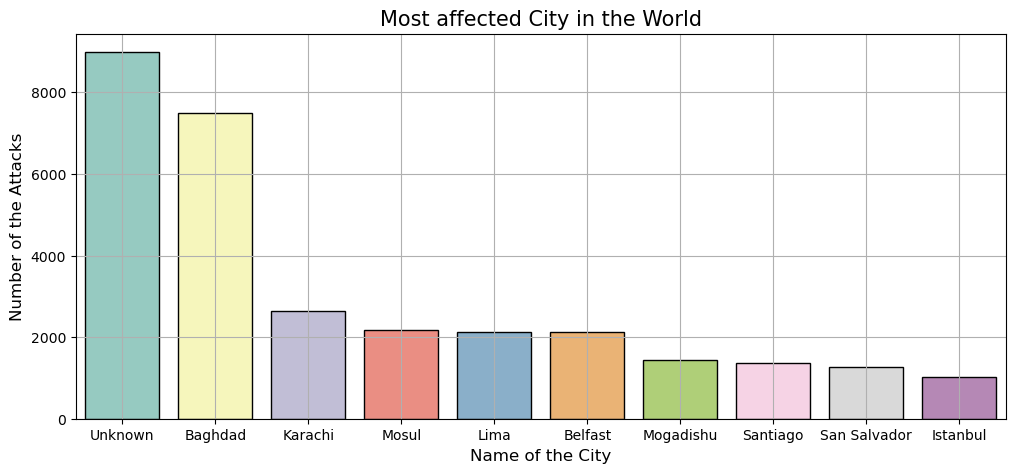

In [63]:
# Bar-plot for top 10 most affected city from terrorism in the world.
plt.figure(figsize=(12,5))
sns.barplot(x='city',y='count',data=top10_city,ec='black',palette='Set3')
plt.title("Most affected City in the World",fontsize=15)
plt.xlabel('Name of the City',fontsize=12)
plt.ylabel("Number of the Attacks",fontsize=12)
plt.grid(True)
plt.show()

# Time Line of number of people kiled in Nort America because of Terrorism.

In [64]:
# create a dataset a.
a=df[df['region']=='North America']
a.head()

,year,country,region,city,attacktype,target,organization,killed
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0
5,1970,United States,North America,Cairo,Armed Assault,Police,Black Nationalists,0
7,1970,United States,North America,Oakland,Bombing/Explosion,Utilities,Unknown,0
8,1970,United States,North America,Madison,Facility/Infrastructure Attack,Military,New Year's Gang,0
9,1970,United States,North America,Madison,Facility/Infrastructure Attack,Government (General),New Year's Gang,0


In [65]:
# create a datset a_a.
a_a = (a.groupby(['country','year'])['killed'].size()).reset_index()
a_a

,country,year,killed
0,Canada,1970,2
1,Canada,1972,4
2,Canada,1974,1
3,Canada,1980,3
4,Canada,1982,4
...,...,...,...
115,United States,2013,20
116,United States,2014,29
117,United States,2015,38
118,United States,2016,64


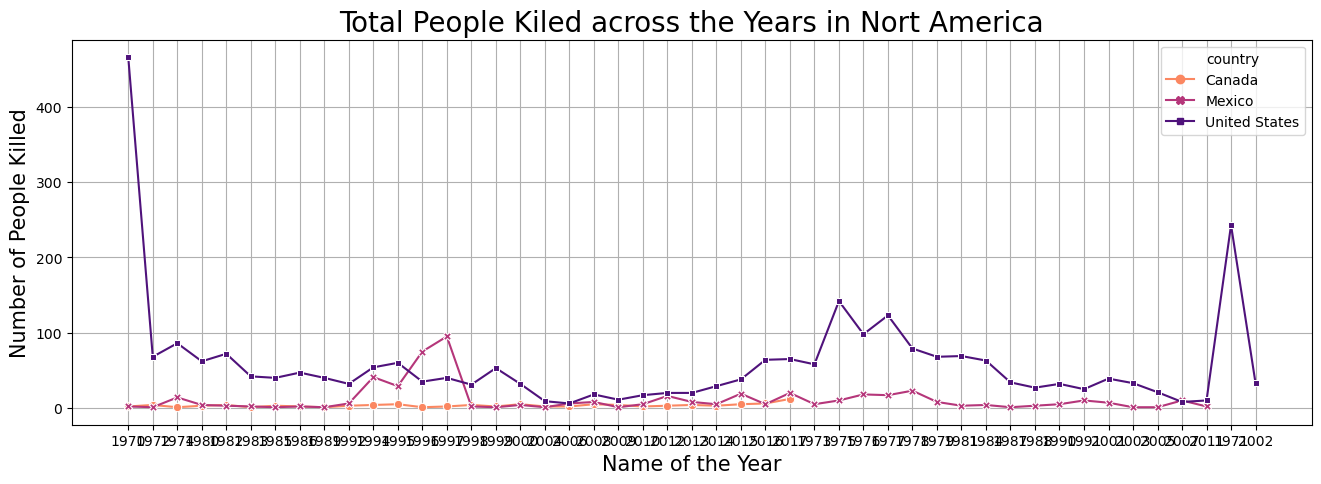

In [66]:
# LinePlot which compare the number of people killed in North American Countries.
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = a_a,x = 'year',y = 'killed',hue = 'country',style = 'country',palette='magma_r',markers=True, dashes=False)
plt.title("Total People Kiled across the Years in Nort America",fontsize=20)
plt.xlabel('Name of the Year',fontsize=15)
plt.ylabel('Number of People Killed',fontsize=15)
plt.grid(True)
plt.show()

# Time Line of number of people killed in Pakistan,Afghanistan and India becausse of Terrorism. 


In [67]:
# value counts of the column region of the dataset df.
df.region.value_counts()

Middle East & North Africa     48171
South Asia                     43887
South America                  17306
Sub-Saharan Africa             15937
Western Europe                 15727
Southeast Asia                 11961
Central America & Caribbean     8022
Eastern Europe                  4973
North America                   3362
East Asia                        763
Central Asia                     558
Australasia & Oceania            276
Name: region, dtype: int64

In [68]:
# create a dataset a.
a=df[df['region']=='South Asia']
a.head()

,year,country,region,city,attacktype,target,organization,killed
585,1970,Pakistan,South Asia,Karachi,Assassination,Government (Diplomatic),Unknown,4
1186,1972,India,South Asia,New Delhi,Hijacking,Airports & Aircraft,Palestinians,0
1863,1973,Afghanistan,South Asia,Kabul,Unknown,Airports & Aircraft,Black December,0
2217,1974,Pakistan,South Asia,Karachi,Bombing/Explosion,Maritime,Muslim Guerrillas,0
2705,1974,Pakistan,South Asia,Peshawar,Bombing/Explosion,Government (Diplomatic),Unknown,0


In [69]:
# value counts of the country column of the dataset a.
a.country.value_counts()

Pakistan       14108
Afghanistan    12223
India          11740
Sri Lanka       2971
Bangladesh      1622
Nepal           1195
Maldives          21
Bhutan             5
Mauritius          2
Name: country, dtype: int64

In [70]:
# create a dataset a.
a=a[(a.country=='Pakistan') | (a.country=='Afghanistan') | (a.country=='India')]
a.head()

,year,country,region,city,attacktype,target,organization,killed
585,1970,Pakistan,South Asia,Karachi,Assassination,Government (Diplomatic),Unknown,4
1186,1972,India,South Asia,New Delhi,Hijacking,Airports & Aircraft,Palestinians,0
1863,1973,Afghanistan,South Asia,Kabul,Unknown,Airports & Aircraft,Black December,0
2217,1974,Pakistan,South Asia,Karachi,Bombing/Explosion,Maritime,Muslim Guerrillas,0
2705,1974,Pakistan,South Asia,Peshawar,Bombing/Explosion,Government (Diplomatic),Unknown,0


In [71]:
# create a dataset a_a.
a_a = (a.groupby(['country','year'])['killed'].size()).reset_index()
a_a

,country,year,killed
0,Afghanistan,1973,1
1,Afghanistan,1979,3
2,Afghanistan,1987,1
3,Afghanistan,1988,11
4,Afghanistan,1989,10
...,...,...,...
112,Pakistan,2013,2160
113,Pakistan,2014,2106
114,Pakistan,2015,1210
115,Pakistan,2016,844


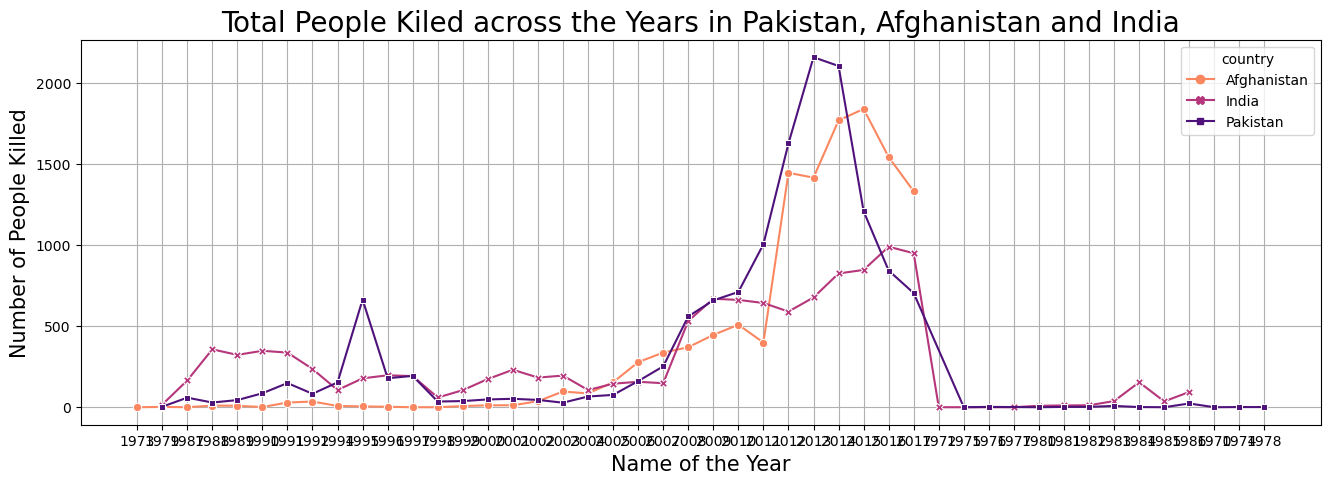

In [72]:
# LinePlot which compare the number of people killed in Pakistan, Afghanistan and India.
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = a_a,x = 'year',y = 'killed',hue = 'country',style = 'country',palette='magma_r',markers=True, dashes=False)
plt.title("Total People Kiled across the Years in Pakistan, Afghanistan and India",fontsize=20)
plt.grid(True)
plt.xlabel('Name of the Year',fontsize=15)
plt.ylabel('Number of People Killed',fontsize=15)
plt.show()

# Time Line of number of people kiled in Iraq and Syria because of Terrorism

In [73]:
# create a dataset a.
a=df[(df.country=='Iraq') | (df.country=='Syria') ]
a.head()

,year,country,region,city,attacktype,target,organization,killed
2512,1974,Syria,Middle East & North Africa,Aleppo,Bombing/Explosion,Government (Diplomatic),Arab Communist Organization,0
2540,1974,Syria,Middle East & North Africa,Aleppo,Bombing/Explosion,Government (Diplomatic),Arab Communist Organization,0
2590,1974,Syria,Middle East & North Africa,Aleppo,Bombing/Explosion,Business,Arab Communist Organization,1
2595,1974,Syria,Middle East & North Africa,Aleppo,Bombing/Explosion,Business,Arab Communist Organization,0
2751,1975,Syria,Middle East & North Africa,Aleppo,Bombing/Explosion,Government (Diplomatic),Popular Front for the Liberation of Palestine ...,0


In [74]:
# create a dataset a_a.
a_a = (a.groupby(['country','year'])['killed'].size()).reset_index()
a_a

,country,year,killed
0,Iraq,1975,1
1,Iraq,1976,3
2,Iraq,1979,1
3,Iraq,1980,6
4,Iraq,1982,2
...,...,...,...
56,Syria,2013,269
57,Syria,2014,286
58,Syria,2015,427
59,Syria,2016,412


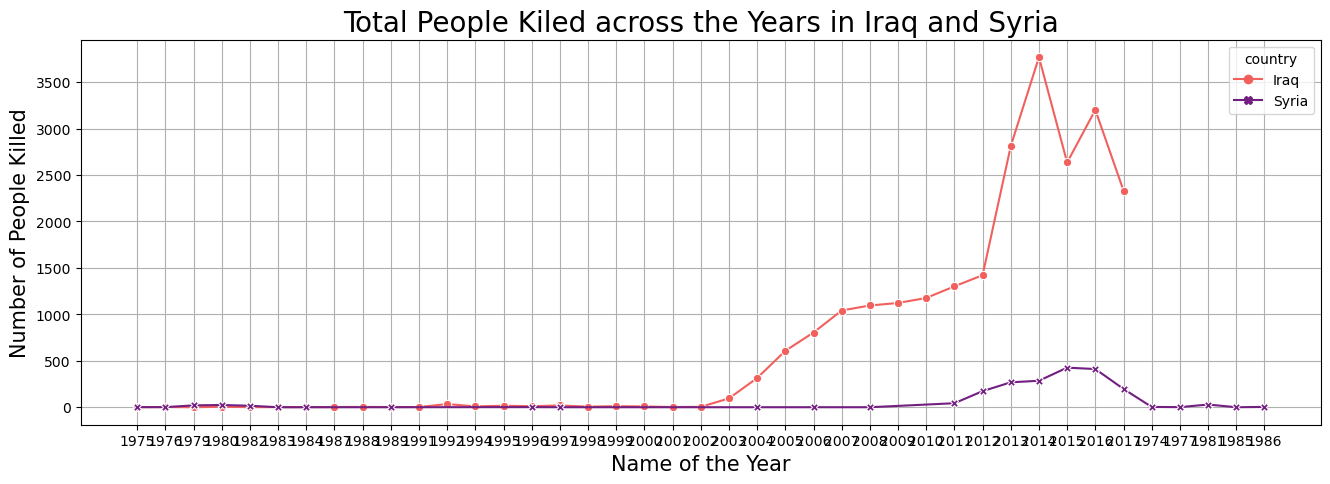

In [75]:
# LinePlot which compare the number of people killed in Iraq and Syria.
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = a_a,x = 'year',y = 'killed',hue = 'country',style = 'country',palette='magma_r',markers=True, dashes=False)
plt.title("Total People Kiled across the Years in Iraq and Syria",fontsize=20)
plt.grid(True)
plt.xlabel('Name of the Year',fontsize=15)
plt.ylabel('Number of People Killed',fontsize=15)
plt.show()

# Target of the terrorists

In [76]:
# value counts of the target column of the dataset.
df['target'].value_counts().head()

Private Citizens & Property    40883
Military                       25622
Police                         23713
Government (General)           20282
Business                       19142
Name: target, dtype: int64

In [77]:
# count of top 5 targets.
list(df['target'].value_counts().head())

[40883, 25622, 23713, 20282, 19142]

In [78]:
# list of the top 5 target of the terrorists.
list(df['target'].value_counts().head().keys())

['Private Citizens & Property',
 'Military',
 'Police',
 'Government (General)',
 'Business']

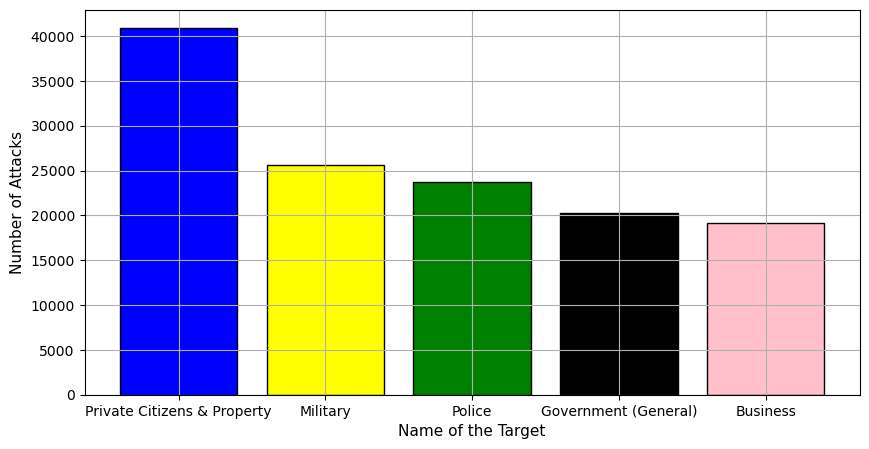

In [81]:
# Bar-plot of top 5 targets of the terrorists.
plt.figure(figsize=(10,5))
col=['blue','yellow','green','black','pink','red']
plt.bar(list(df['target'].value_counts().head().keys()),list(df['target'].value_counts().head()),color=col,ec='black')
plt.grid(True)
plt.xlabel('Name of the Target',fontsize=11)
plt.ylabel('Number of Attacks',fontsize=11)
plt.show()

# Deadliest year in terms of death of people by terrorism

In [83]:
# create a year dataset.
year=(df.groupby(['year'])['killed'].size()).reset_index()
year
year.head()

,year,killed
0,1970,609
1,1971,407
2,1972,524
3,1973,424
4,1974,523


In [84]:
# sort the year dataset in descending order of the killed colum.
year=year.sort_values(by=['killed'],ascending=False).head()
year

,year,killed
43,2014,15881
44,2015,14160
45,2016,12809
42,2013,11685
46,2017,10285


In [85]:
# list of the top 5 years where maximum people killed by terrorism.
list(year['year'])

['2014', '2015', '2016', '2013', '2017']

In [86]:
# count of the killed in the top 5 year.
list(year['killed'])

[15881, 14160, 12809, 11685, 10285]

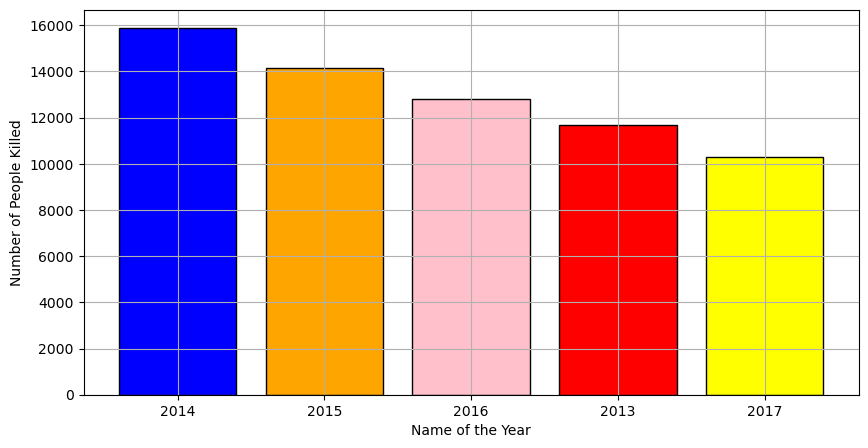

In [89]:
# bar-plot for top 5 years where maximum number of people killed by terrorism.
plt.figure(figsize=(10,5))
color=['blue','orange','pink','red','yellow']
plt.bar(list(year['year']),list(year['killed']),color=color,ec='black')
plt.grid(True)
plt.xlabel('Name of the Year')
plt.ylabel('Number of People Killed')
plt.show()

From the above we can say that , year 2014 is the deadlist year in the history of terrorism.About 16000 people died in the single year by terrorism.